In [1]:

# import os
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
# # tensorflow2.0
import tensorflow as tf
from tensorflow.keras import Input,Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten,Dense,Dropout,Conv2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras import regularizers

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print( x_train.shape)
print( x_test.shape)

(60000, 784)
(10000, 784)


In [99]:
dim = 162
w,h = 28,28

class Encoder(tf.keras.Model):
    def __init__(self, w, h):
        super().__init__()
        global dim
            
        self.fc2 = Dense(dim, activation='relu',
#                          activity_regularizer=regularizers.l1(10e-5), # 在encoder上添加L1稀疏约束，可以对比添加与不添加的区别
                         input_shape=(w*h,)
                         )

    def call(self,x):

        x = self.fc2(x)
        return x

class Decoder(tf.keras.Model):
    def __init__(self, w, h):
        super().__init__()
        global dim
        Out_dim = w*h

        self.fc2 = Dense(Out_dim, activation='sigmoid', input_shape=(dim,)
#                          activity_regularizer=regularizers.l1(10e-5), # 在encoder上添加L1稀疏约束，可以对比添加与不添加的区别
                        )
    def call(self,x):

        x = self.fc2(x)

        return x


In [100]:

input_img = Input(shape=(w*h),)
encoder = Encoder(w,h)
encoded = encoder(input_img)
decoder = Decoder(w,h)
decoded = decoder(encoded)

autoencoder = Model(input_img, decoded)
autoencoder(input_img)

encoder.summary()
decoder.summary()
autoencoder.summary()

Model: "encoder_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 162)               127170    
Total params: 127,170
Trainable params: 127,170
Non-trainable params: 0
_________________________________________________________________
Model: "decoder_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 784)               127792    
Total params: 127,792
Trainable params: 127,792
Non-trainable params: 0
_________________________________________________________________
Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
encode

In [101]:
# tensorflow
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [102]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print( x_train.shape)
print( x_test.shape)

(60000, 784)
(10000, 784)


In [103]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2669 - val_loss: 0.0232
Epoch 2/15
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0106 - val_loss: 0.0049
Epoch 3/15
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0032 - val_loss: 0.0021
Epoch 4/15
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0016 - val_loss: 0.0012
Epoch 5/15
60000/60000 [==============================] - 1s 15us/sample - loss: 9.3439e-04 - val_loss: 7.4226e-04
Epoch 6/15
60000/60000 [==============================] - 1s 16us/sample - loss: 6.1579e-04 - val_loss: 5.0888e-04
Epoch 7/15
60000/60000 [==============================] - 1s 16us/sample - loss: 4.3339e-04 - val_loss: 3.6775e-04
Epoch 8/15
60000/60000 [==============================] - 1s 16us/sample - loss: 3.1910e-04 - val_loss: 2.7593e-04
Epoch 9/15
60000/60000 [==============================] - 1s 1

In [98]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder(encoded_imgs).numpy()

In [104]:
# Or
decoded_imgs = autoencoder.predict(x_test)

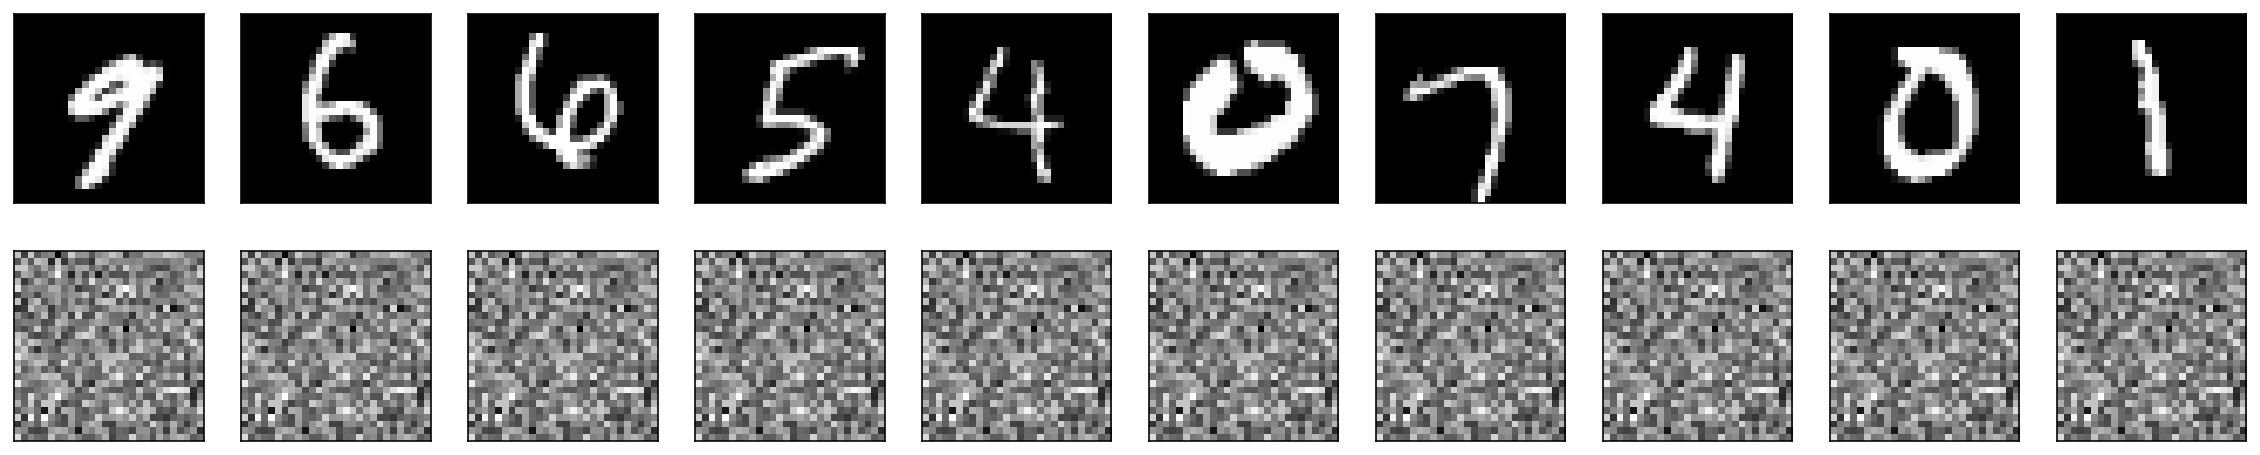

In [105]:
import matplotlib.pyplot as plt


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    loc = i + 20
    plt.imshow(x_test[loc].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[loc].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 无比简单的VAE


In [3]:
# keras
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print( x_train.shape)
print( x_test.shape)

(60000, 784)
(10000, 784)


In [19]:
encoding_dim = 32

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

encoder.summary()
decoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# keras
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [20]:
# tensorflow2.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [21]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.4483 - val_loss: 0.1527
Epoch 2/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0672 - val_loss: 0.0275
Epoch 3/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0171 - val_loss: 0.0105
Epoch 4/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0076 - val_loss: 0.0055
Epoch 5/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0043 - val_loss: 0.0033
Epoch 6/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0027 - val_loss: 0.0022
Epoch 7/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0019 - val_loss: 0.0016
Epoch 8/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0014 - val_loss: 0.0012
Epoch 9/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0010 - val_

In [22]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [23]:
# Or
decoded_imgs = autoencoder.predict(x_test)

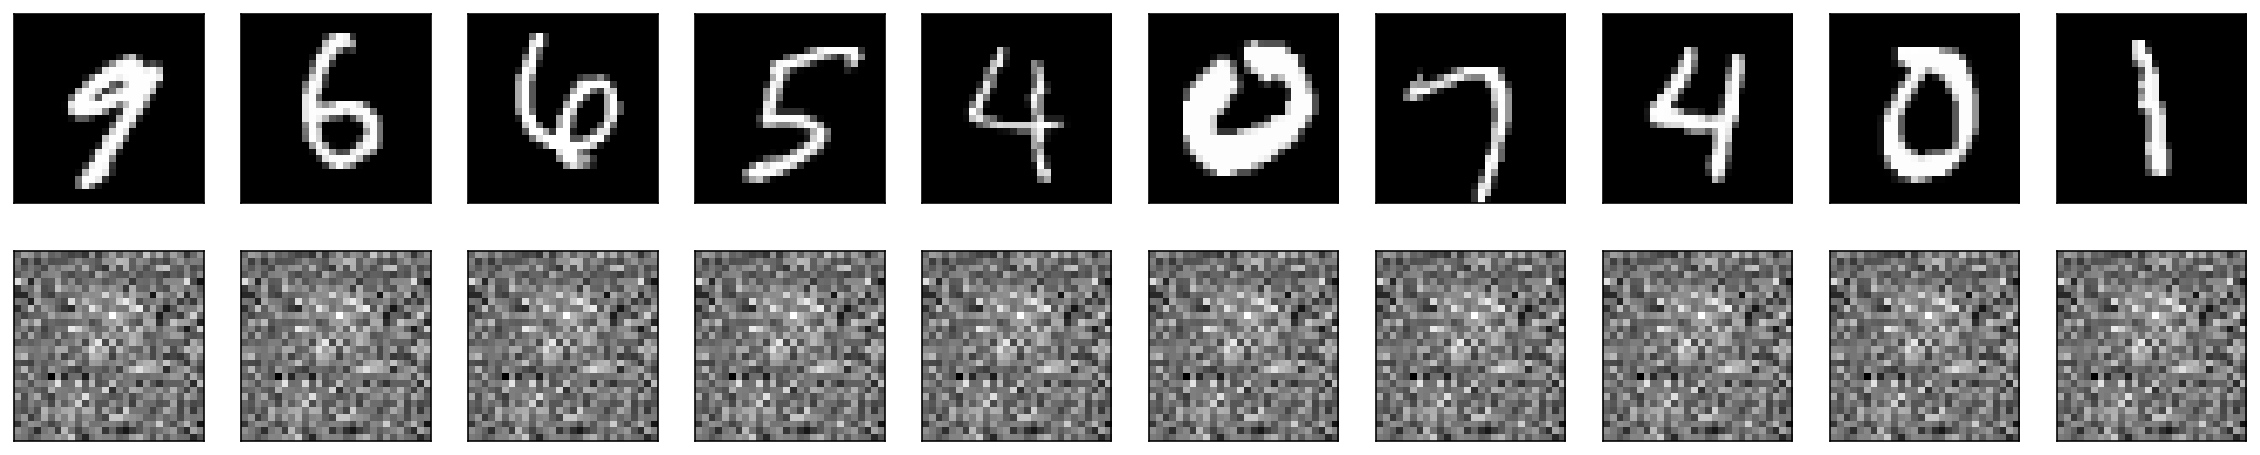

In [24]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    loc = i + 20
    plt.imshow(x_test[loc].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[loc].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()